In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv("Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df['Total_spent']=df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,Total_spent
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<Axes: xlabel='Total_spent', ylabel='sales'>

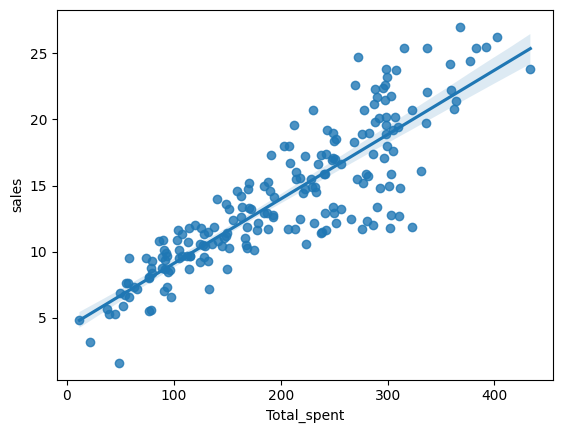

In [4]:
sns.regplot(data=df,x='Total_spent',y='sales')


In [5]:
X=df['Total_spent']
y=df['sales']

np.polyfit(X,y,deg=1)


array([0.04868788, 4.24302822])

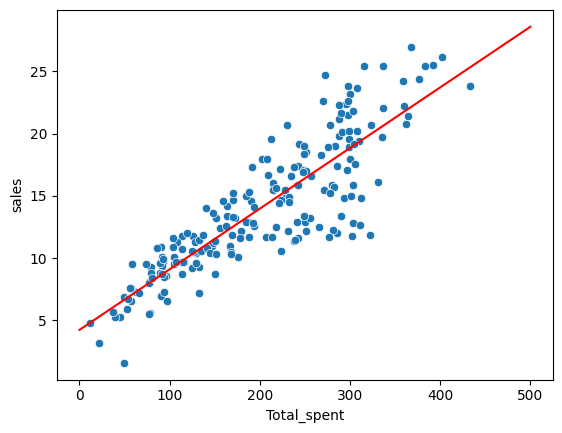

In [6]:
potential_spent=np.linspace(0,500,100)
potential_sales=0.04868788*potential_spent +  4.24302822
sns.scatterplot(data=df,x='Total_spent',y='sales')
plt.plot(potential_spent,potential_sales,color='red')


In [7]:
spend=int(input('enter the value'))
predicted_val=0.04868788*spend + 4.24302822
print(f"the ans:{predicted_val}")

enter the value 50


the ans:6.67742222


In [8]:
np.polyfit(X,y,deg=3)
# the answer indicates for B3X**3+B2X**2+B1X+B0 B3,B2 hav negligible coeffcient relation 


array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

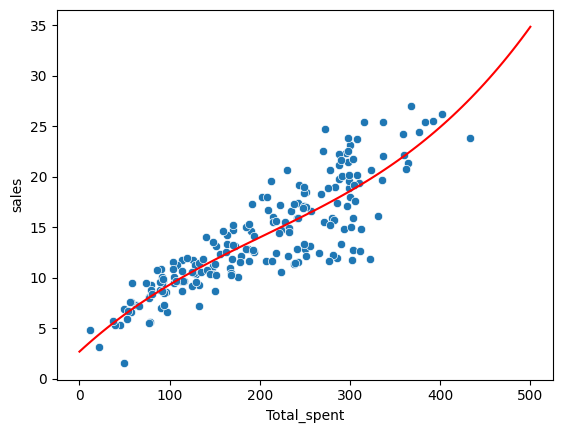

In [9]:
pot_spend=np.linspace(0,500,100)
pot_sales=3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend**1 + 2.70495053e+00
sns.scatterplot(data=df,x='Total_spent',y='sales')
plt.plot(pot_spend,pot_sales,color='red')

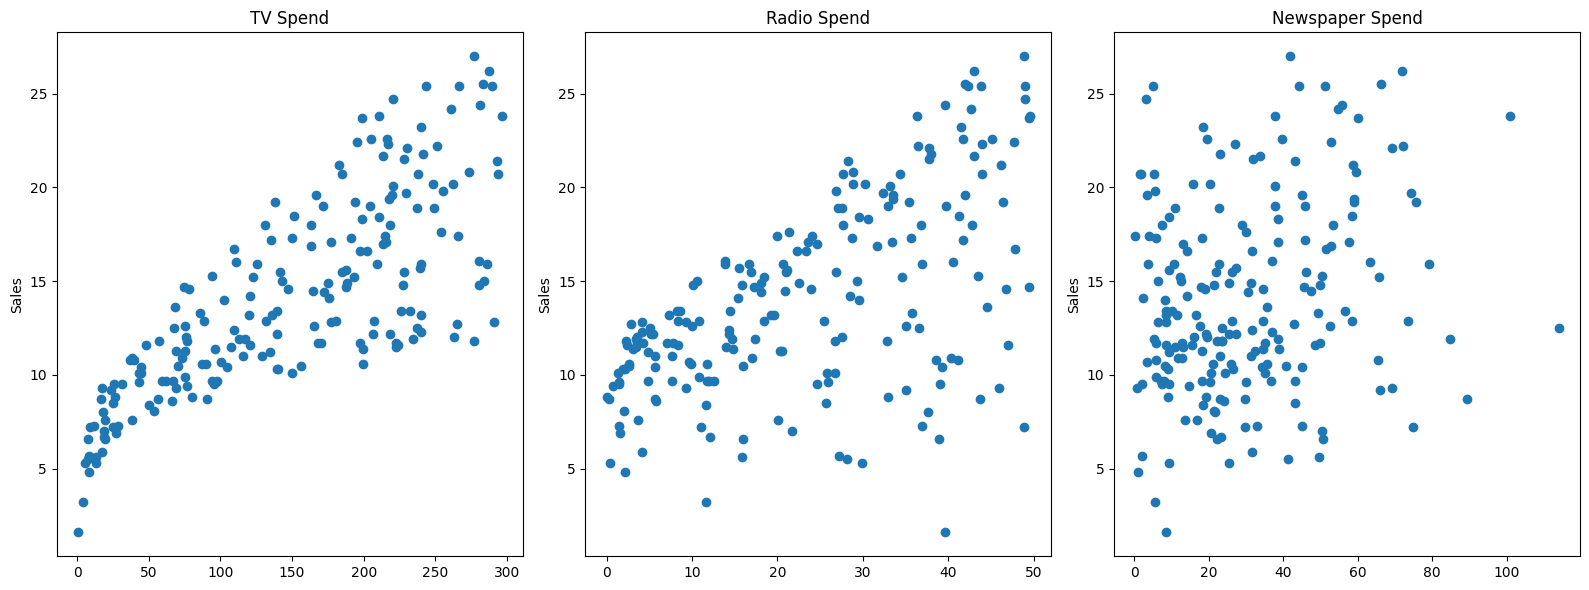

In [10]:
df=pd.read_csv("Advertising.csv")
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();               

In [28]:
X=df.drop('sales',axis=1)
y=df['sales']


In [12]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

,TV,radio,newspaper
154,187.8,21.1,9.5
114,78.2,46.8,34.5
118,125.7,36.9,79.2
64,131.1,42.8,28.9
165,234.5,3.4,84.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [14]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [15]:
test_predictions=model.predict(X_test)
test_predictions

array([15.64343813, 19.58078283, 11.42717781, 16.90494334,  9.17645232,
        7.01921001, 20.24548588, 17.27288092,  9.81362002, 19.15221858,
       12.36281849, 13.90086335, 13.74679921, 21.16322282, 18.31876004,
        9.96472602, 15.56312703,  7.73452007,  7.57314037, 20.32745421,
        7.79414911, 18.16308067, 24.57041484, 22.71055089,  8.01558318,
       12.65730219, 21.43661308,  8.04499619, 12.43159447, 12.40259255,
       10.70029092, 19.16776811, 10.10150532,  6.69083331, 17.24889776,
        7.79224406,  9.25952001,  8.31516806, 10.51963092, 10.67086792,
       12.88094679,  9.79344981, 10.20060813,  8.013982  , 11.54267429,
       10.07800983,  8.98583386, 16.21285502, 13.20750313, 20.70094692,
       12.42670309, 13.96572233, 17.55475937, 11.15936616, 12.58108647,
        5.54230087, 23.22486082, 12.58536565, 18.76366836, 15.15376302,
       15.15931391, 23.91773675,  6.78191588, 19.84529505, 13.86858162,
       21.07676645])

In [16]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

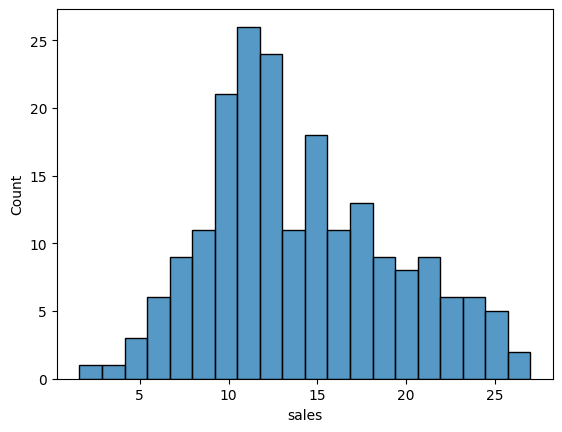

In [17]:
sns.histplot(data=df,x='sales',bins=20)


In [18]:
mean_absolute_error(y_test,test_predictions)


1.236918849425931

In [19]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.532440942651242

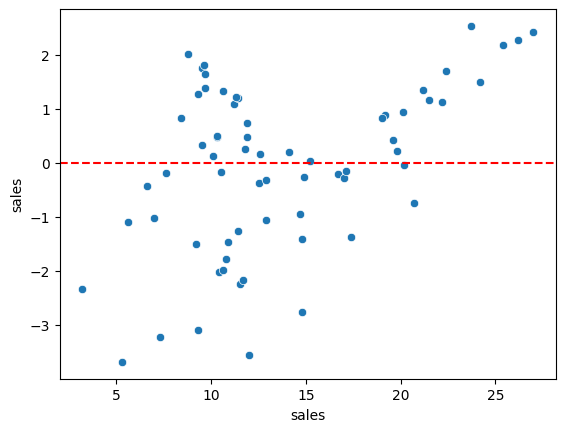

In [20]:
test_residuals=y_test-test_predictions
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(color='red',ls='--',y=0)# the data is distributed random no pattern

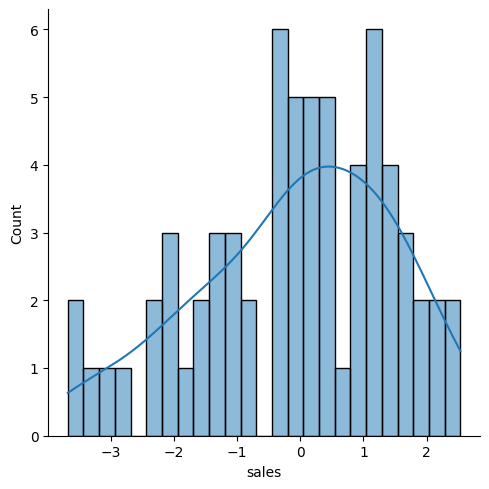

In [21]:
sns.displot(x=test_residuals,kde=True,bins=25)

In [22]:
final_model=LinearRegression()
final_model.fit(X,y)

final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

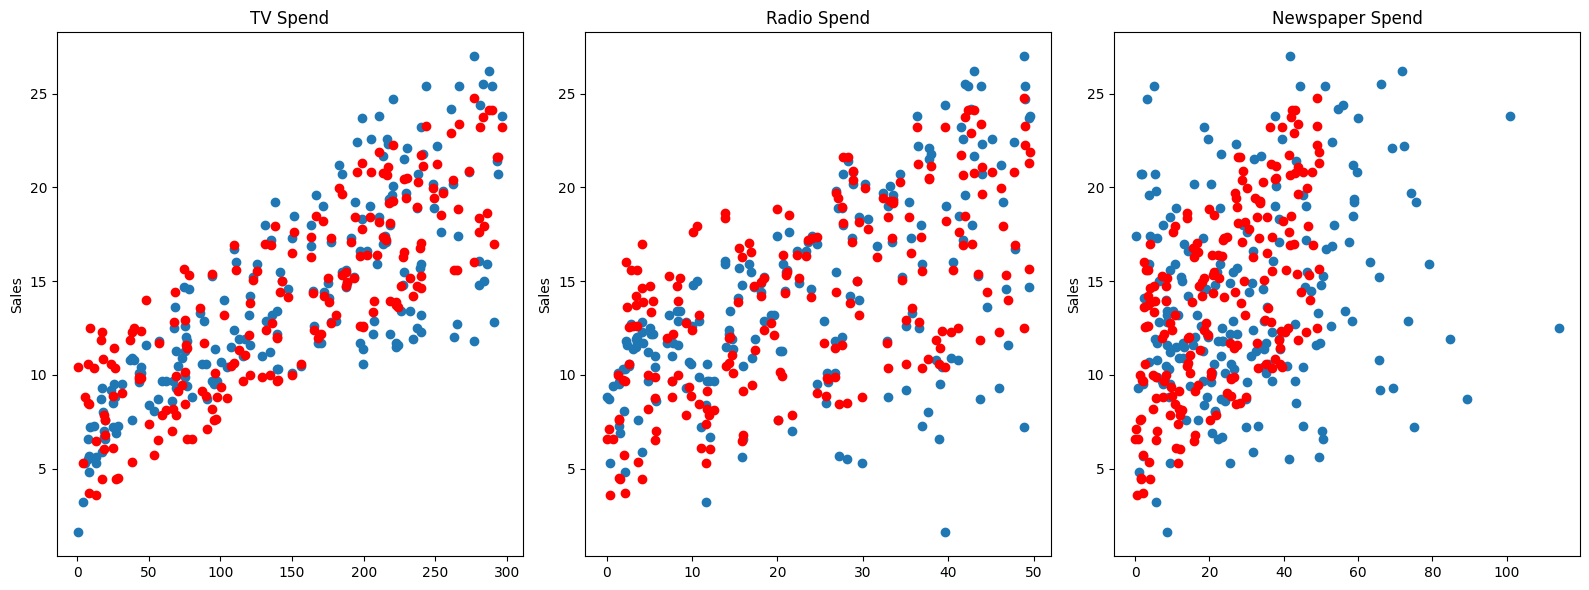

In [23]:
y_hat=final_model.predict(X)
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [24]:
from joblib import dump,load
dump(final_model,'final_sales_model.joblib')

loaded_model=load('final_sales_model.joblib')
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [25]:
print("enter the values of tv,radio,newspaper adv cost")
x=int(input(""))
y=int(input(""))
z=int(input(""))
campaign=[[x,y,z]]
loaded_model.predict(campaign)

enter the values of tv,radio,newspaper adv cost


 20
 50
 60


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.21843354])

In [26]:
# polynomial regression